In [91]:
# Import Dependencies

import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [92]:
# Target User Accounts
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYT")

# Variable for sentiments dictionary
sentiments = []

# Loop through all target users
for target in target_users:

    # Counter variable
    counter = 0
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 5 pages of tweets (total 100 tweets)
    public_tweets = api.user_timeline(target, count=100)

    # Loop through each tweet
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter

        # Add sentiments for each tweet to an array
        sentiments.append({"Tweet": tweet["text"],
                           "News Org": target,
                           "Tweets Ago": counter,
                        "Date": tweet["created_at"], 
                       "Compound": compound,
                       "Positive": pos,
                       "Negative": neu,
                       "Neutral": neg})

        # Add to counter 
        counter = counter + 1

In [93]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)

# Configure dataframe column order and display
sentiments_pd = sentiments_pd[['News Org',
                        'Tweets Ago',
                         'Date',
                         'Tweet',
                         'Compound',
                         'Positive',
                         'Neutral',
                         'Negative']]

# Save DataFrame as a csv

sentiments_pd.to_csv("news_twitter_sentiments.csv", encoding="utf-8", index=False)

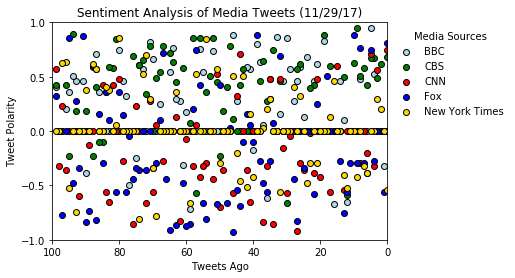

In [94]:
# Create overlaid scatterplots of news organizations' compound scores for last 100 tweets
# To improve this section: 
# Overlay 5 scatterplots in a loop; 
# Use zip funtion to zip to lists for org,color
# Use enumerate to track list position.

# Create dictionary to hold news org color mapping for following plots 
orgs_colors_dict = {'@BBC':'lightblue',
                   '@CBS': 'green',
                   '@CNN': 'red',
                   '@FoxNews': 'blue',
                   '@NYT': 'gold'}

# Create new org scatterplots using the dataframe's "Tweets Ago" and "Compound" columns as x and y respectively
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@BBC")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@BBC")["Compound"],
                  facecolors=orgs_colors_dict['@BBC'], edgecolors='black', label="BBC")
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@CBS")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@CBS")["Compound"],
                  facecolors=orgs_colors_dict['@CBS'], edgecolors='black', label="CBS")
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@CNN")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@CNN")["Compound"],
                  facecolors=orgs_colors_dict['@CNN'], edgecolors='black', label="CNN")
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@FoxNews")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@FoxNews")["Compound"],
                  facecolors=orgs_colors_dict['@FoxNews'], edgecolors='black', label="Fox")
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@NYT")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@NYT")["Compound"],
                  facecolors=orgs_colors_dict['@NYT'], edgecolors='black', label="New York Times")

# Set textual properties
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f'Sentiment Analysis of Media Tweets ({now})')
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

# Configure axes
plt.xlim(100, 0)
plt.ylim(-1.0, 1.0)
yticks = [-1.0, -0.5, 0.0, 0.5, 1.0]
plt.yticks(yticks)

# Add Media Sources to legend and place next to chart
plt.legend(title="Media Sources", bbox_to_anchor=(1, 1), frameon=False)

# Save graph as .png image and display
plt.savefig("sentiment_100_tweets.png")
plt.show()

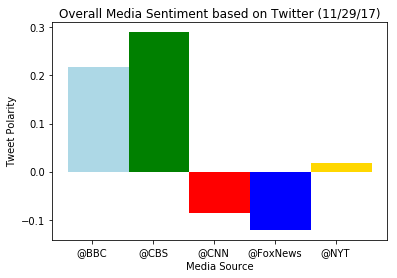

In [95]:
# Build a bar chart of overall (mean) compound sentiment of the last 100 tweets for each news org

# Set x axis and tick locations
x_axis = np.arange(sentiments_pd["News Org"].nunique())
tick_locations = [value+0.4 for value in x_axis]

# Set title and axis labels
plt.title(f'Overall Media Sentiment based on Twitter ({now})')
plt.xlabel("Media Source")
plt.ylabel("Tweet Polarity")

# Create bar chart
plt.bar(x_axis, sentiments_pd.groupby("News Org").mean()["Compound"], color=orgs_colors_dict.values(), align="edge", width=1)
plt.xticks(tick_locations, sentiments_pd["News Org"].unique())

# Save graph as .png image and display
plt.savefig("overall_sentiment_100.png")
plt.show()